In [1]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import os

In [2]:
#get the raw data of selfies

raw_selfies = os.path.join("PIE", "raw")
images = []

#convert them

for img_path in sorted([f for f in os.listdir(raw_selfies) if f.endswith(".jpg")]):
    
    #get pictures
    
    path = os.path.join(raw_selfies, img_path)
    img = Image.open(path).convert("L")
    
    #the size of pictures
    
    width, height = img.size 
    
    #calculate & convert
    
    img = img.crop((width // 8, height // 8, 7 * width // 8, 7 * height // 8)).resize((32,32), PIL.Image.LANCZOS)  
    images.append(img)
    img.save(os.path.join("PIE", "0", img_path))

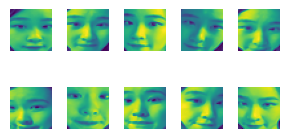

In [3]:
#show them

num_rows = 2
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(3, 2))
axes = axes.flatten()
for i, (image, ax) in enumerate(zip(images, axes)):
    #ax.imshow(image, cmap='gray')
    ax.imshow(image)
    ax.axis("off")
plt.tight_layout()
plt.show()

In [4]:
import random
import numpy as np

In [5]:
# choose randomly

random.seed(5026)
target = np.sort([0] + random.sample(range(1, 69), 25))
print(f"Subject {target} are chosen.")

Subject [ 0  4  5  8  9 11 21 22 24 27 28 33 43 44 46 47 48 49 53 55 56 57 60 65
 66 68] are chosen.


In [6]:
num = []
for i in target:
    files = os.listdir(os.path.join("PIE", str(i)))
    n = len([j for j in files if j.endswith('.jpg')])
    num.append(n)
#print (num)
#print (sum(num))

In [7]:
# input & output (empty)

X = np.empty((sum(num), 32, 32))
y = np.empty((sum(num), 1))

In [8]:
# set input and output in empty X & y

for i, j in enumerate(target):
    for k, img_path in enumerate([f for f in os.listdir(os.path.join('PIE', str(j))) if f.endswith('.jpg')]):
        img_path = os.path.join('PIE', str(j), str(k+1)+'.jpg')
        X[sum(num[:i]) + k, :, :] = np.array(Image.open(img_path))
        y[sum(num[:i]) + k] = j   

In [9]:
# selfie / CMUPIE

X_CMU = X[y.flatten() != 0, :, :]
y_CMU = y[y != 0]
X_self = X[y.flatten() == 0, :, :]
y_self = y[y == 0]

In [10]:
# split CMUPIE
np.random.seed(42)
total_samples = len(X_CMU)
train_size = int(0.7 * total_samples)
train_indices = np.random.choice(total_samples, train_size, replace=False)
X_train_CMU = X_CMU[train_indices]
y_train_CMU = y_CMU[train_indices]
X_test_CMU = np.delete(X_CMU, train_indices, axis=0)
y_test_CMU = np.delete(y_CMU, train_indices, axis=0)

In [11]:
# split selfie
np.random.seed(42)
total_samples = len(X_self)
train_size = int(0.7 * total_samples)
train_indices = np.random.choice(total_samples, train_size, replace=False)
X_train_self = X_self[train_indices]
y_train_self = y_self[train_indices]
X_test_self = np.delete(X_self, train_indices, axis=0)
y_test_self = np.delete(y_self, train_indices, axis=0)

In [12]:
# get train & test data together

X_train = np.concatenate([X_train_CMU, X_train_self], axis = 0)
y_train = np.concatenate([y_train_CMU, y_train_self], axis = 0)
X_test = np.concatenate([X_test_CMU, X_test_self], axis = 0)
y_test = np.concatenate([y_test_CMU, y_test_self], axis = 0)